# Глава 4. Быстрая сортировка 

### "Разделяй и властвуй" 

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
large = 36; med = 24; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")

Представьте, что вы фермер, владеющий земельным участком.

In [3]:
w = np.random.randint(0, 1680, (1, 1000))
h = np.random.randint(0, 640, (1, 1000))

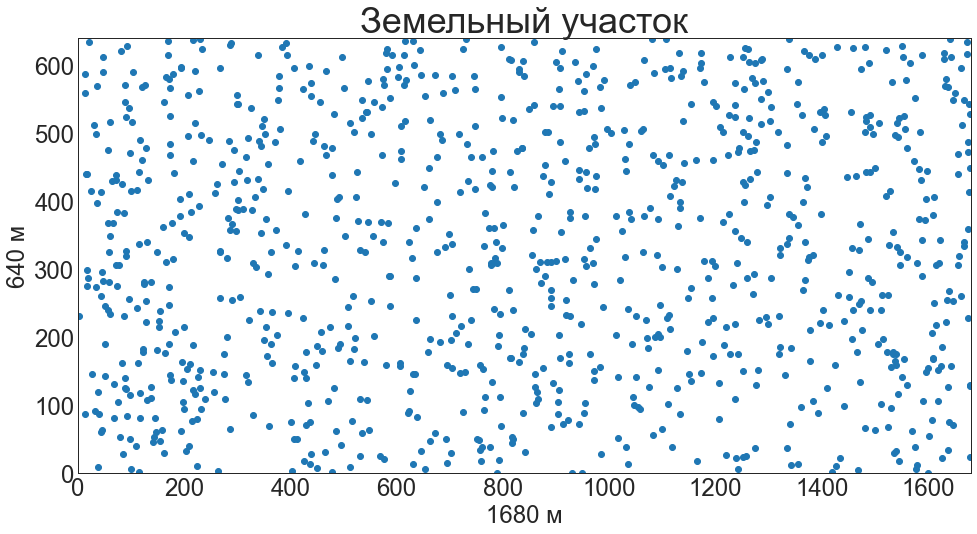

In [4]:
plt.figure(figsize=(16, 8))

plt.scatter(w, h)

plt.xlabel('1680 м')
plt.ylabel('640 м')
plt.title('Земельный участок', fontsize=36)

plt.axis([0, 1680, 0, 640])

plt.show()

Нужно равномерно разделить землю на одинаковые квадратные участки.

Как определить наибольший размер квадрата для участка? 
Воспользоваться стратегией *"Разделяй и властвуй"*

Решение задачи методом *"Разделяй и властвуй"* состоит из двух шагов:

    1. Сначала определяется базовый случай. Это должен быть простейший случай из всех возможныйх.
    2. Задача делится или сокращается до тех пор, пока не будет 

Базовый случай для нашей задачи:
    Длина одной стороны кратна длине другой стороны.

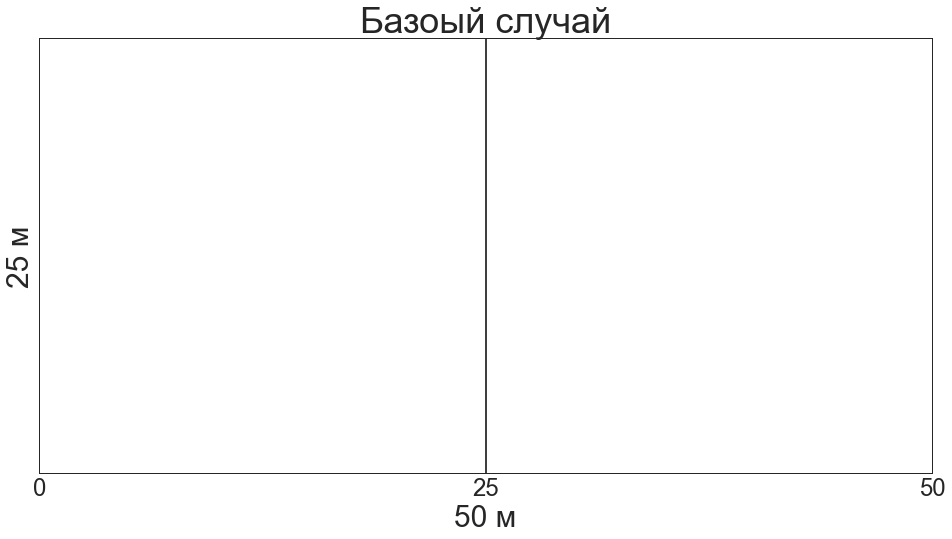

In [5]:
plt.figure(figsize=(16, 8))

y = np.linspace(0, 25, 250)
plt.plot([25] * 250, y, color='black')

plt.xlabel('50 м', fontsize=30)
plt.ylabel('25 м', fontsize=30)
plt.title('Базоый случай', fontsize=36)

plt.axis([0, 50, 0, 25])
plt.xticks([0,25,50])
plt.yticks([])
plt.show()

Как добавить линию посредине графика?? чтобы она ровно разделила его пополам и получилось два квадрата...

Теперь вычислим рекурсивный случай.

Для начала разметим самые большие участки, которые можно использовать.

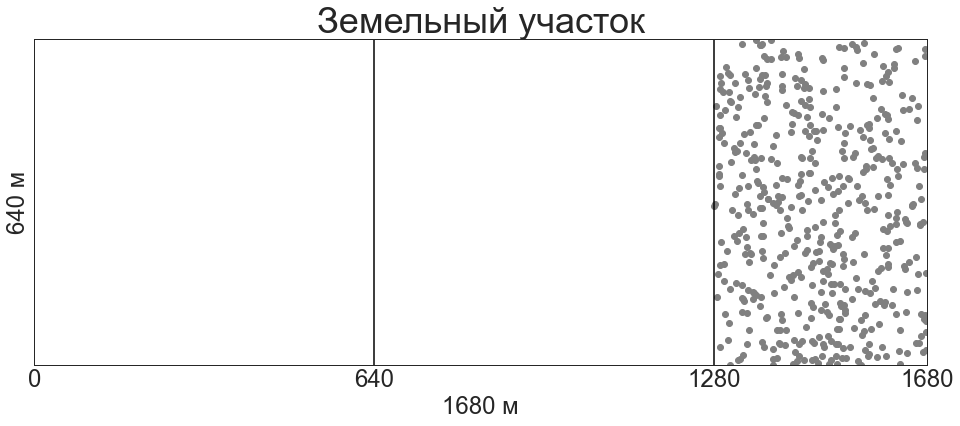

In [6]:
plt.figure(figsize=(16, 6))

y = np.linspace(0, 640, 250)
plt.plot([640] * 250, y, color='black')
plt.plot([1280] * 250, y, color='black')

x_g = np.random.randint(1280, 1680, (1, 500))
y_g = np.random.randint(0, 640, (1, 500))
plt.scatter(x_g, y_g, color='gray')

plt.xlabel('1680 м')
plt.ylabel('640 м')
plt.title('Земельный участок', fontsize=36)

plt.axis([0, 1680, 0, 640])
plt.xticks([0,640,1280,1680])
plt.yticks([])
plt.show()

В исходном участке можно разметить два участка 640х640, и еще останется место.
Нераспределенный остаток - это тоже участок, котороый нужно разделить. Применим к нему тот же алгоритм.

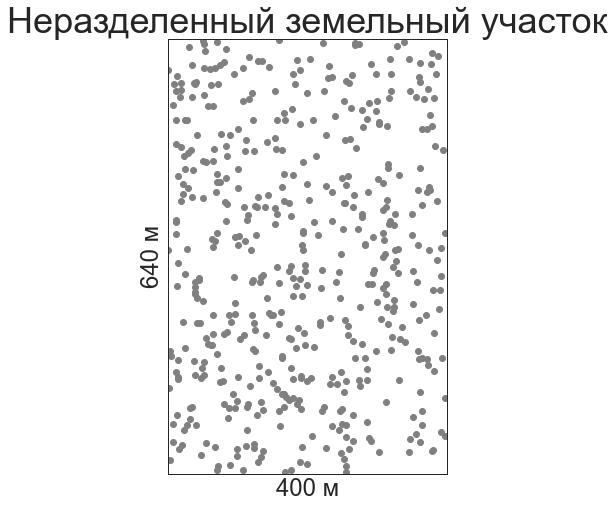

In [7]:
new_w = np.random.randint(0, 400, (1, 500))
new_h = np.random.randint(0, 640, (1, 500))
plt.figure(figsize=(5, 8))

plt.scatter(new_w, new_h, color='gray')

plt.xlabel('400 м')
plt.ylabel('640 м')
plt.title('Неразделенный земельный участок', fontsize=36)

plt.axis([0, 400, 0, 640])
plt.xticks([])
plt.yticks([])

plt.show()

Применив тот же алгортим снова. Мы получим, что размер самого большого квадрата, который можно создать на участке составляет 400х400 м.

Остается меньший сегмент размерами 400х240 м. И т.д.

В итоге мы приходим к *базовому случаю* - участку размерами 160 на 80 м.

Если разбить этот сегмент на квадраты, ничего лишнего не останется!

**Итак, для исходного участка земли самый большой размер квадратного участка будет равен 80 х 80 м.**

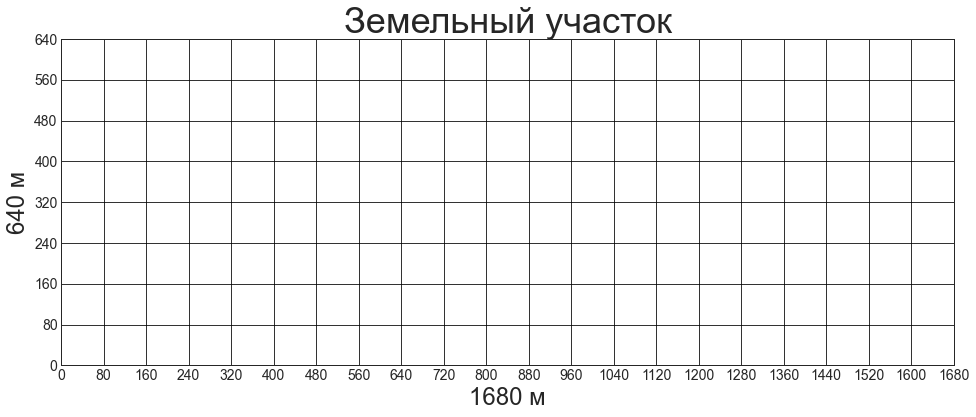

In [8]:
plt.figure(figsize=(16, 6))

plt.xlabel('1680 м')
plt.ylabel('640 м')
plt.title('Земельный участок', fontsize=36)

plt.axis([0, 1680, 0, 640])

delen_x = np.linspace(0,1680,22)
delen_y = np.linspace(0,640,9)
plt.xticks(delen_x, fontsize=14)
plt.yticks(delen_y, fontsize=14)
plt.grid(color='black')

plt.show()

С помощью стратегии "*Разделяй и властвуй*" мы разбили земельный участко размермами 1680 х 640 м на равные квадратные участки с наибольшим возможным размером.

### Рассмотрим еще один пример. 

Имеется массив чисел 'a'

In [9]:
a = [2, 4, 6]
a

[2, 4, 6]

Нужно проссумировать все числа и вернуть сумму. 

Первый вариант решения - использовать цикл.

In [10]:
def summ(a):
    result = 0
    for i in a:
        result += i
    return result

In [11]:
print(summ(a))

12


Второй вариант - использовать рекурсию

**Базовый случай** - массив содержит 0 или 1 элемент.

**Рекурсивный случай** - если в передаваемом списке больше 1 элемента, то сумма всех элементов списка равна сумме первого элемента и оставшейся части списка.

In [12]:
def summ(a):
    if a == []:
        return 0
    else:
        return a[0] + summ(a[1:])

In [13]:
print(summ(a))

12


In [14]:
b = []

In [15]:
print(summ(b))

0


### Упраждения 

1. Написать рекурсивную функцию для подсчета элементов в списке

In [16]:
def count_el(a):
    if a == []:
        return 0
    else:
        return 1 + count_el(a[1:])

In [17]:
print(count_el(a))

3


In [18]:
my_list = [1, 2, 3, 4, 15, 6, 7, 8, 9, 10]

In [19]:
print(count_el(my_list))

10


2. Найти наибольшее число в списке

In [20]:
def max_val(a):
    if a == []:
        return 0
    else:
        maxi = max_val(a[1:])
        if maxi > a[0]:
            return maxi
        else:
            return a[0]
    

In [21]:
print(max_val(a))

6


In [22]:
print(max_val(my_list))

15


3. Определить базовый и рекурсивный случай для **бинарного поиска**

In [23]:
my_list = sorted(my_list)

In [24]:
def bin_search(a, el):
    if a == []:
        return 'Список пуст'
    elif len(a) == 1:
        if a[0] == el:
            return a[0]
        else:
            return f'Элемента {el} нет в списке'
    else:
        first = 0
        last = len(a) - 1
        mid = int((first + last) / 2)
        if a[mid] == el:
            return mid
        elif a[mid] < el:
            bin_search(a[mid + 1:], el)
        else:
            bin_search(a[:mid - 1], el)
        return f'Элемента {el} нет в списке'

In [25]:
print(bin_search(my_list, 6))

4


**Базовый случай:**

    if a == []:
        return 'Список пуст'
    elif len(a) == 1:
        if a[0] == el:
            return a[0]
        else:
            return f'Элемента {el} нет в списке'
**Рекурсивный случай:**
    
        else:
        first = 0
        last = len(a) - 1
        mid = int((first + last) / 2)
        if a[mid] == el:
            return mid
        elif a[mid] < el:
            bin_search(a[mid + 1:], el)
        else:
            bin_search(a[:mid - 1], el)
        return f'Элемента {el} нет в списке'
    

## Быстрая сортировка 

Быстрая сортировка относится к алгоритмам сортировки.


Воспользуемся быстрой сортировкой для упорядочения массива.

**Базовый случай**

Пустые массивы и массивы, содержащие всего один элемент не нужно сортировать, поэтому они станут базовым случаем. Такие массивы можно просто возвращать в исходном виде:

    def quick_sort(array):
        if len(array) < 2:
        return array

In [26]:
a0 = []
a1 = [7]

Массив из двух элементов тоже сортируется без особых проблем:
    
    Сравниваем два элемента. 
    Если первый элемент меньше второго, меняем их местами.

In [27]:
a2 = [1 , 7]

In [28]:
def sort_two(a):
    if a[0] < a[1]:
        a[0], a[1] = a[1], a[0]
    return a

In [29]:
print(sort_two(a2))

[7, 1]


Теперь перейдем к массивам большего размера.

Алгоритм быстрой сортировки работает так: сначала в массиве выбирается элемент, который называется *опорным*

In [30]:
a3 = [15, 10, 33]

In [31]:
op = a3[2]
print(f'Опорный элементы списка - {op}')

Опорный элементы списка - 33


Далее в массиве находятся элементы меньше опорного, и элементы, больше опорного.

Этот процесс называется *разделением*

In [32]:
def prep(a):
    low = []
    high = []
    for i in a:
        if i > op:
            high.append(i)
        elif i < op:
            low.append(i)
    return f'{low}, {op}, {high}'

In [33]:
print(prep(a3))

[15, 10], 33, []


Получнные массивы не отсортированы - они просто выделены из исходного массива.

Если бы подмассивы были отсортированы, то их можно было бы объединить в порядке "левый подмассив - опорный элемент - правый подмассив" и получить отсортированный массив.

    [10, 15] + [33] + [] = [10, 15, 33]

Сортировка полученного массивы можно провести с помощью **базового случая** (то есть для пустых массивов и массивов с одним или двумя элементами)

Как насчет массива из четырех элементов?

In [34]:
a4 = [33, 10, 15, 7]

Опорный элемент также оставим 33

In [35]:
op = a4[0]

Применив для этого массивы функцию разделения - получим подмассивы.

In [36]:
print(prep(a4))

[10, 15, 7], 33, []


Как сортировать массив из трех элементов мы уже знаем. Нужно рекурсивно применить к нему быструю сортировку. И так далее для бОльшего числа элементов.

Напишем код **быстрой сортировки** в общем случае

In [37]:
def quick_sort(a):
    if len(a) < 2:
        return a
    else:
        op = a[0]
        less = [i for i in a[1:] if i <= op]
        greater = [i for i in a[1:] if i > op]
        return quick_sort(less) + [op] + quick_sort(greater)

In [38]:
array = np.random.randint(0, 100, 10)
print(array)
print(quick_sort(array))

[ 6 24 54 19 99 33 77 97 40 33]
[6, 19, 24, 33, 33, 40, 54, 77, 97, 99]


## Снова "О-большое" 

Алгоритм быстрой сортировки уникален тем, что его скорость зависит от выбора опорного элемента.

Прежде чем рассматривать быструю сортировку, вспомним наиболее типичные варианты времени выполнения для "О-большое"

In [39]:
df = pd.DataFrame({
    "O(log n)": ['0.3 с', '0.6 c', '1 c'],
    "O(n)": ['1 с', '10 с', '100 с'],
    "O(n * log n)": ['3.3 с', '66.4 с', '996 с'],
    "O(n^2)": ['10 с', '16.6 мин', '27,7 час'],
    "O(n!)": ['4,2 дня', '2,9 * 10^144 лет', '1,27 * 10^2359 лет']
}, index=['10 элементов', '100 элементов', '1 000 элементов'])

df

,O(log n),O(n),O(n * log n),O(n^2),O(n!)
10 элементов,0.3 с,1 с,3.3 с,10 с,"4,2 дня"
100 элементов,0.6 c,10 с,66.4 с,16.6 мин,"2,9 * 10^144 лет"
1 000 элементов,1 c,100 с,996 с,"27,7 час","1,27 * 10^2359 лет"


In [40]:
def fact(i):
    if i == 1:
        return i
    else:
        return i * fact(i - 1)

In [41]:
def fact_list(a):
    res = []
    for i in a:
        f = fact(i)
        res.append(f)
    return res

In [42]:
x = np.arange(0, 1001)
y = x
y1 = np.log(x)
y2 = x * (np.log(x))
y3 = x**2
x4 = [1, 2, 3, 4, 5, 6, 7]
y4 = fact_list(x4)

In [43]:
large = 24; med = 14; small = 8
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")

(0.0, 1000.0)

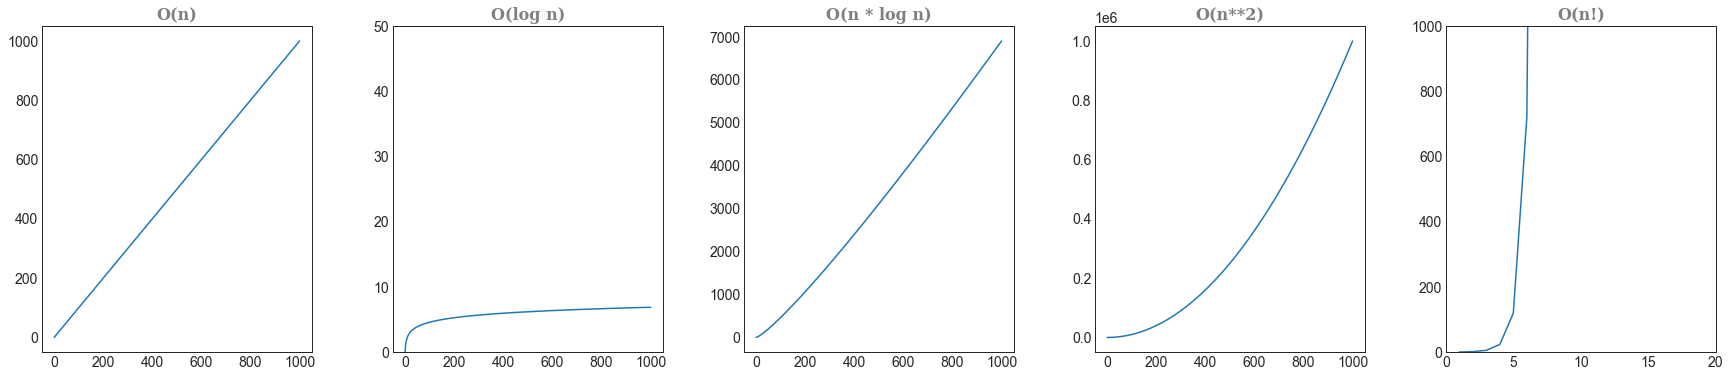

In [44]:
title_font = {
    "fontsize": 16,
    "fontweight": "bold",
    "color": "#808080",
    "family": "serif",
}

axis_font = {
    "fontsize": 14,
    "family": "serif",
}

fig, ax = plt.subplots(nrows=1, ncols=5)
ax1, ax2, ax3, ax4, ax5 = ax.flatten()

fig.set_size_inches(30, 6)
fig.subplots_adjust(wspace=0.3, hspace=0.3)

ax1.plot(x, y)
ax1.set_title("O(n)", fontdict=title_font)

ax2.plot(x, y1)
ax2.set_title("O(log n)", fontdict=title_font)
ax2.set_ylim([0, 50])

ax3.plot(x, y2)
ax3.set_title("O(n * log n)", fontdict=title_font)

ax4.plot(x, y3)
ax4.set_title("O(n**2)", fontdict=title_font)

ax5.plot(x4, y4)
ax5.set_title("O(n!)", fontdict=title_font)
ax5.set_xlim([0, 20])
ax5.set_ylim([0, 1000])